In [1]:
"""
from PIL import Image
import os
import cv2

for img in os.listdir("/content/drive/MyDrive/3_resized/"):
  #image = Image.open("/content/drive/MyDrive/3_resized/"+img)
  #new_image = image.resize((28, 28))
  #new_image.save("/content/drive/MyDrive/3_resized/"+img)
  grey_img = cv2.imread("/content/drive/MyDrive/3_resized/"+img)
  gray = cv2.cvtColor(grey_img, cv2.COLOR_BGR2GRAY)
  gray = np.expand_dims(gray, 2)
  status = cv2.imwrite("/content/drive/MyDrive/3_resized/"+img,gray)
"""




'\nfrom PIL import Image\nimport os\nimport cv2\n\nfor img in os.listdir("/content/drive/MyDrive/3_resized/"):\n  #image = Image.open("/content/drive/MyDrive/3_resized/"+img)\n  #new_image = image.resize((28, 28))\n  #new_image.save("/content/drive/MyDrive/3_resized/"+img)\n  grey_img = cv2.imread("/content/drive/MyDrive/3_resized/"+img)\n  gray = cv2.cvtColor(grey_img, cv2.COLOR_BGR2GRAY)\n  gray = np.expand_dims(gray, 2)\n  status = cv2.imwrite("/content/drive/MyDrive/3_resized/"+img,gray)\n'

In [9]:
import os
print(len(os.listdir("/content/drive/MyDrive/3_resized/")))


305


In [10]:
import os
import pandas as pd
from torchvision.io import read_image

import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

from torch import nn
from torch.utils.data import DataLoader
from torchvision import transforms
import numpy as np
import uuid
import cv2


In [11]:
class CustomImageDataset(Dataset):
    def __init__(self, img_dir, transform=None, target_transform=None):
        path_label = []
        for fil in os.listdir("/content/drive/MyDrive/3_resized/"):
            path_label.append(["/content/drive/MyDrive/3_resized/"+fil, "3"])

        self.img_labels = pd.DataFrame(path_label)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        
        image =torch.from_numpy( cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)).type(torch.float32)

        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label
        

In [3]:
dataset = CustomImageDataset(img_dir="/content/drive/MyDrive/3_resized/")
train_dataloader = DataLoader(dataset, batch_size=64, shuffle=True)


In [4]:
import torchvision

dataset

Starting epoch 0...
Losses after mini-batch     0: generator 6.745160e-01, discriminator 9.306648e-01
Starting epoch 1...
Losses after mini-batch     0: generator 6.785333e-01, discriminator 7.105806e-01
Starting epoch 2...
Losses after mini-batch     0: generator 6.849966e-01, discriminator 7.048520e-01
Starting epoch 3...
Losses after mini-batch     0: generator 6.913863e-01, discriminator 7.001135e-01
Starting epoch 4...
Losses after mini-batch     0: generator 7.000122e-01, discriminator 6.946069e-01
Starting epoch 5...
Losses after mini-batch     0: generator 7.171271e-01, discriminator 6.837826e-01
Starting epoch 6...
Losses after mini-batch     0: generator 7.533879e-01, discriminator 6.530310e-01
Starting epoch 7...
Losses after mini-batch     0: generator 7.524730e-01, discriminator 6.525552e-01
Starting epoch 8...
Losses after mini-batch     0: generator 7.815644e-01, discriminator 6.309790e-01
Starting epoch 9...
Losses after mini-batch     0: generator 7.931767e-01, discrim

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:97: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Starting epoch 21...
Losses after mini-batch     0: generator 7.959936e-01, discriminator 7.309805e-01
Starting epoch 22...
Losses after mini-batch     0: generator 7.819282e-01, discriminator 7.346698e-01
Starting epoch 23...
Losses after mini-batch     0: generator 7.456593e-01, discriminator 8.779146e-01
Starting epoch 24...
Losses after mini-batch     0: generator 8.977157e-01, discriminator 6.501533e-01
Starting epoch 25...
Losses after mini-batch     0: generator 9.364016e-01, discriminator 6.514423e-01
Starting epoch 26...
Losses after mini-batch     0: generator 8.245074e-01, discriminator 7.266509e-01
Starting epoch 27...
Losses after mini-batch     0: generator 9.316388e-01, discriminator 6.335724e-01
Starting epoch 28...
Losses after mini-batch     0: generator 9.270622e-01, discriminator 6.103232e-01
Starting epoch 29...
Losses after mini-batch     0: generator 1.037250e+00, discriminator 5.936378e-01
Starting epoch 30...
Losses after mini-batch     0: generator 5.720634e-0

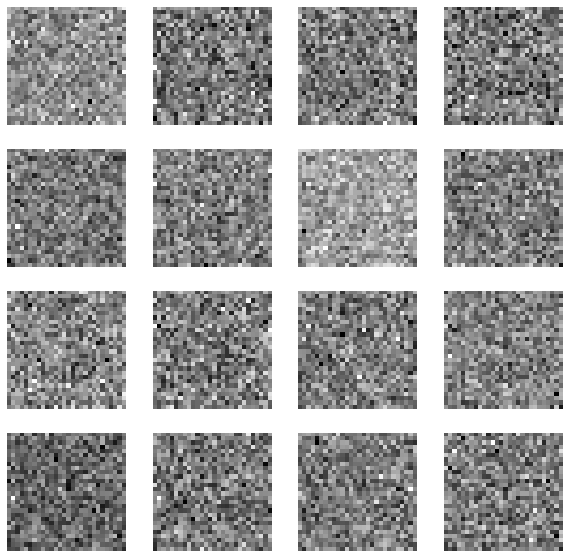

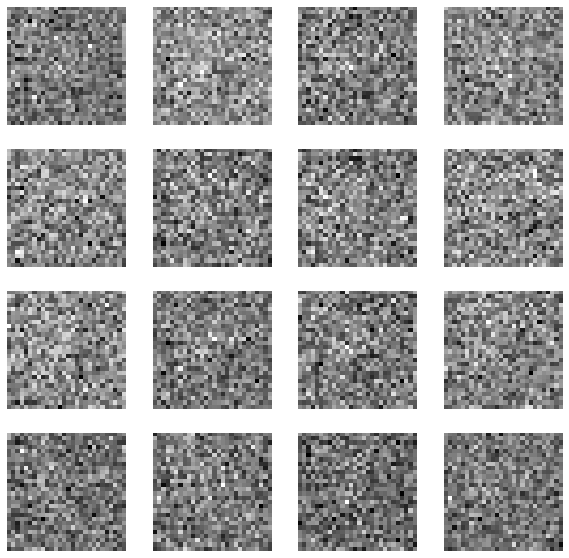

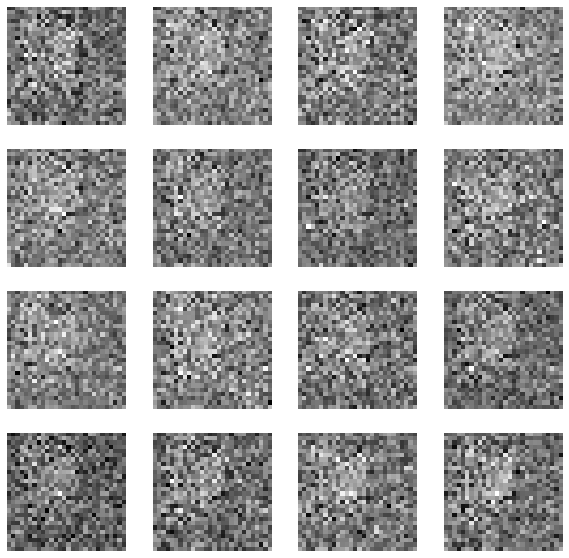

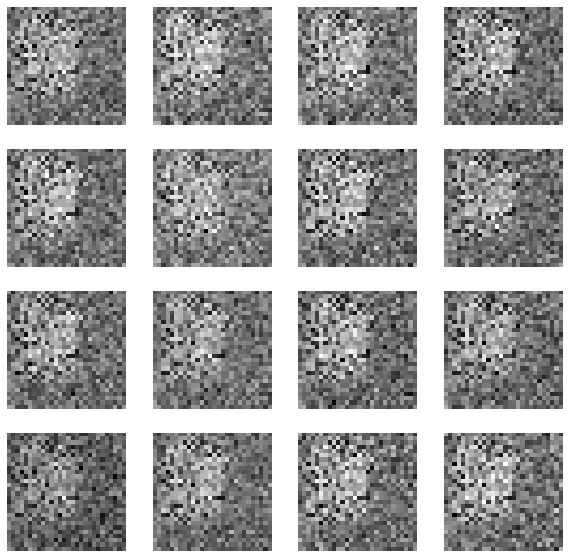

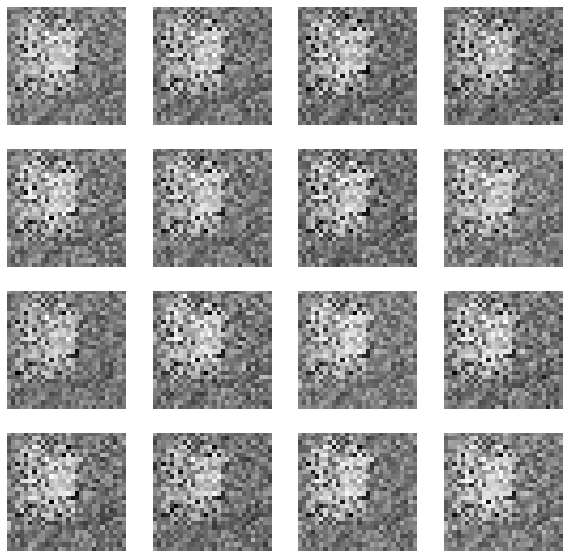

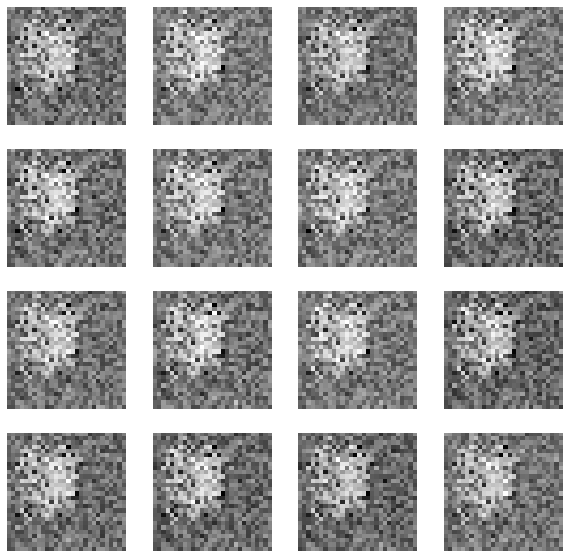

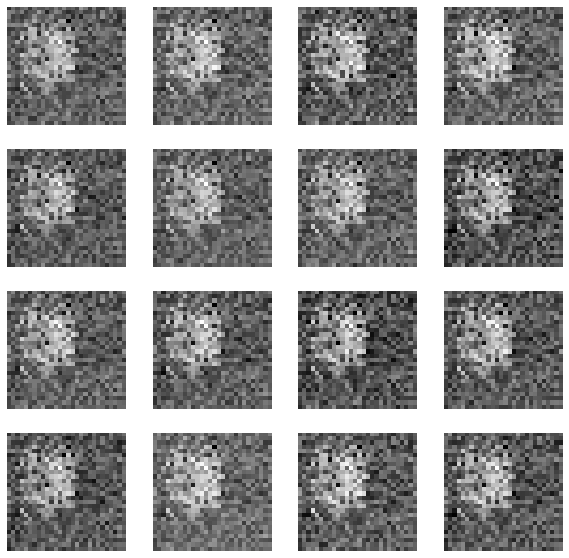

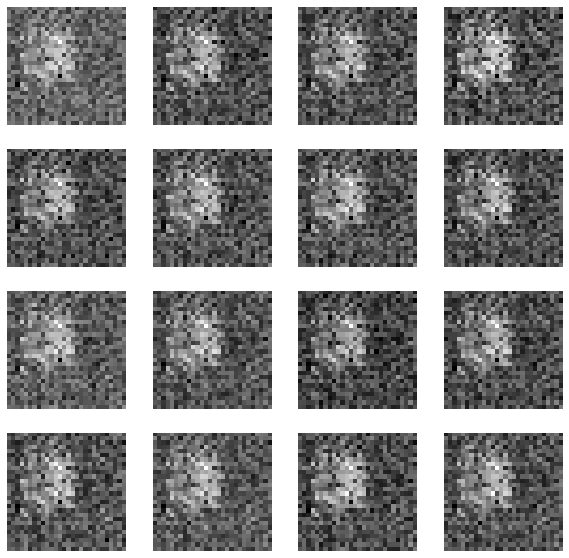

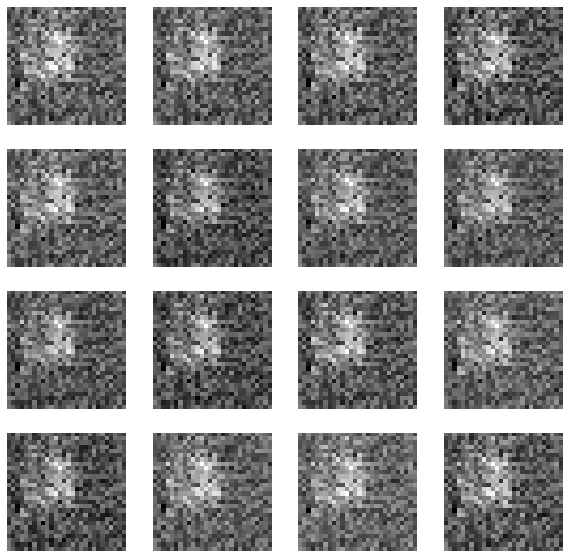

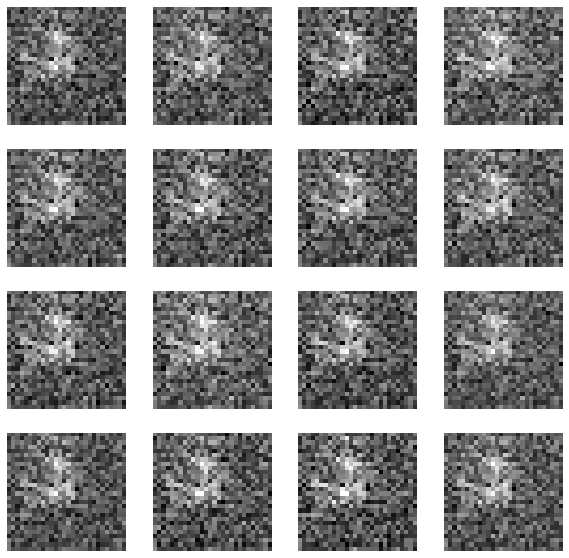

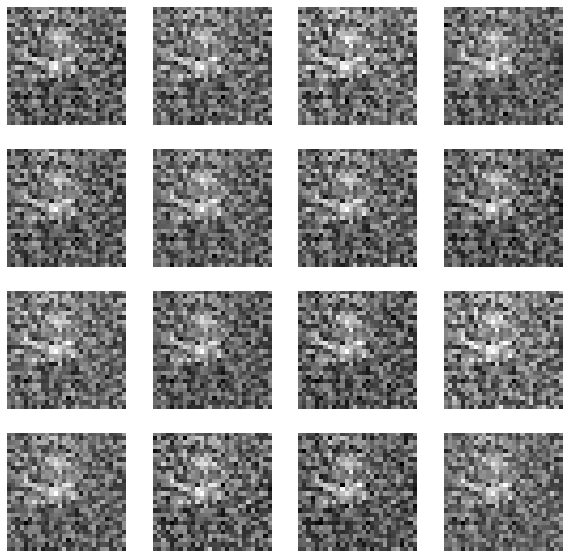

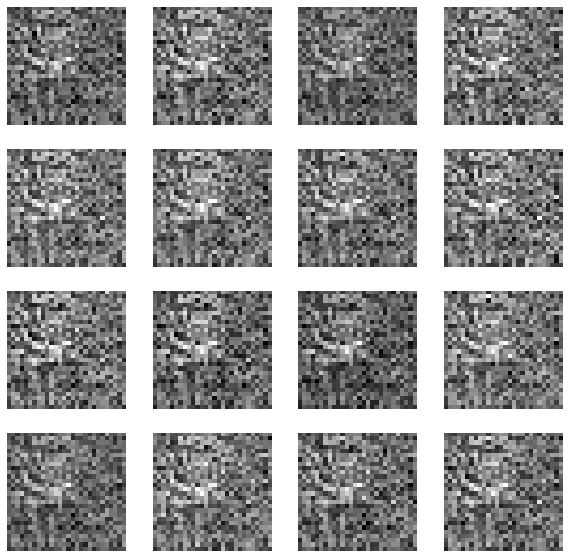

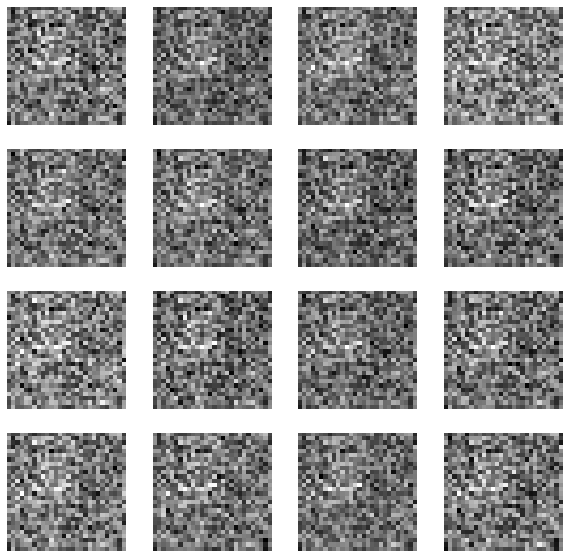

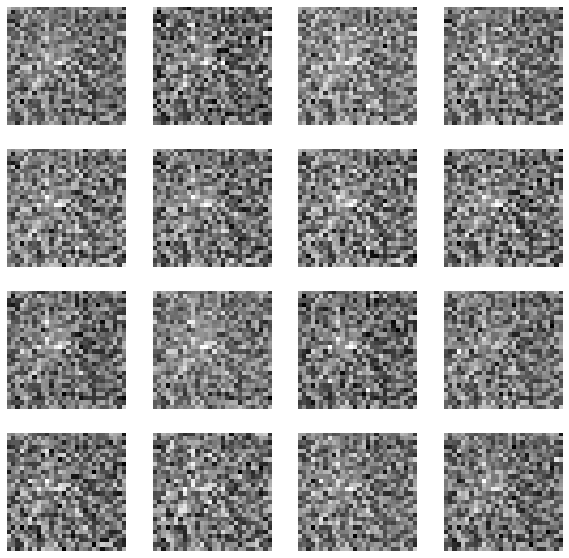

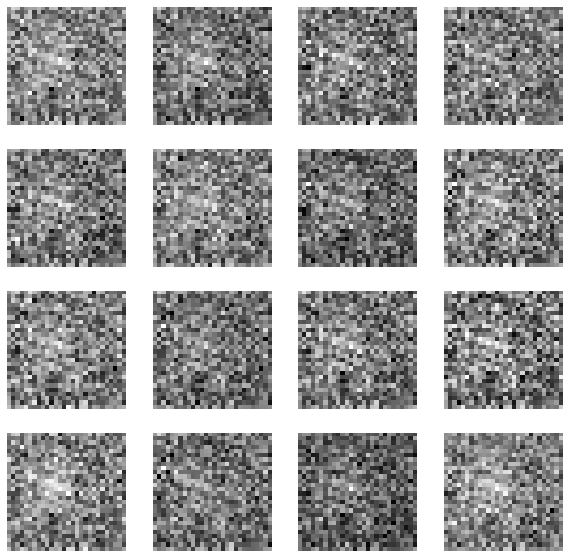

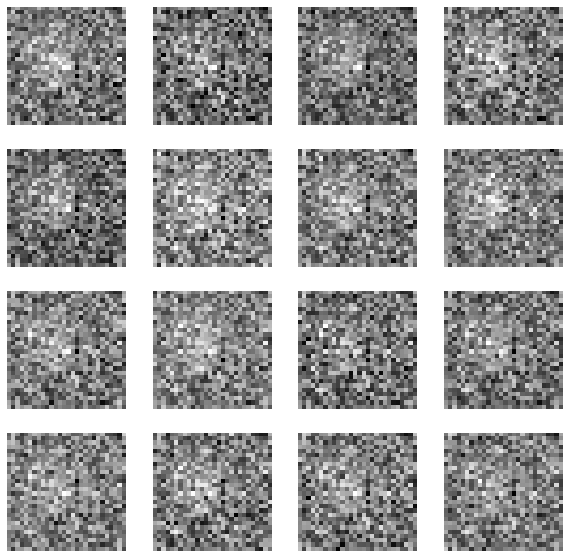

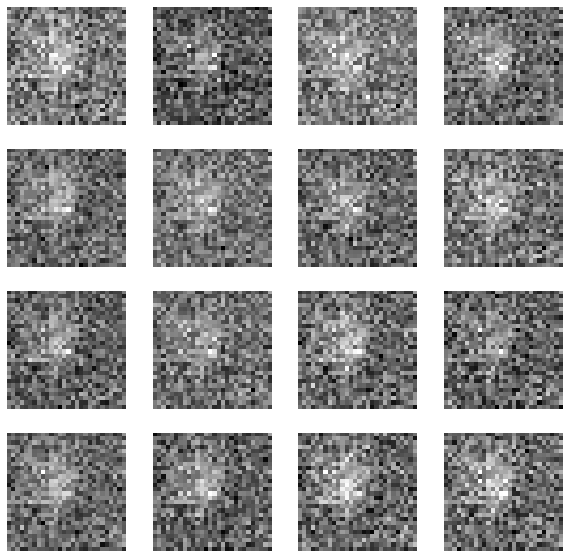

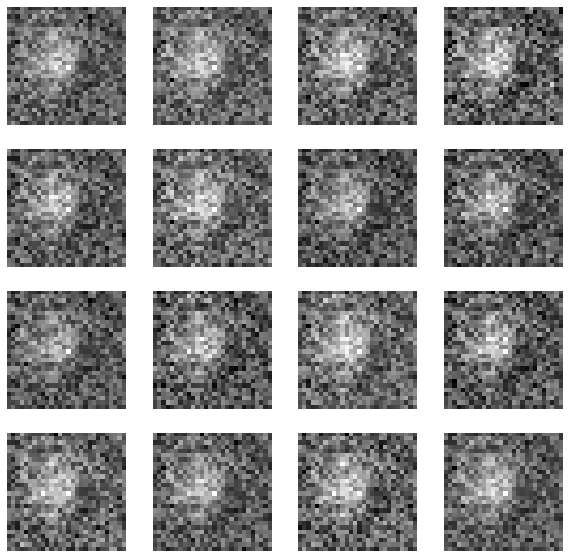

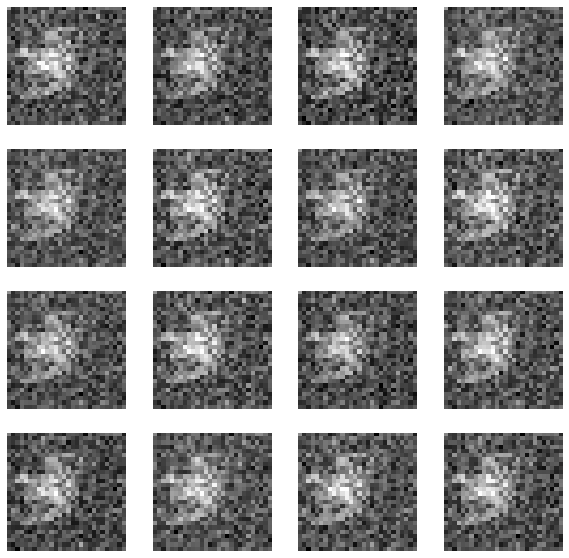

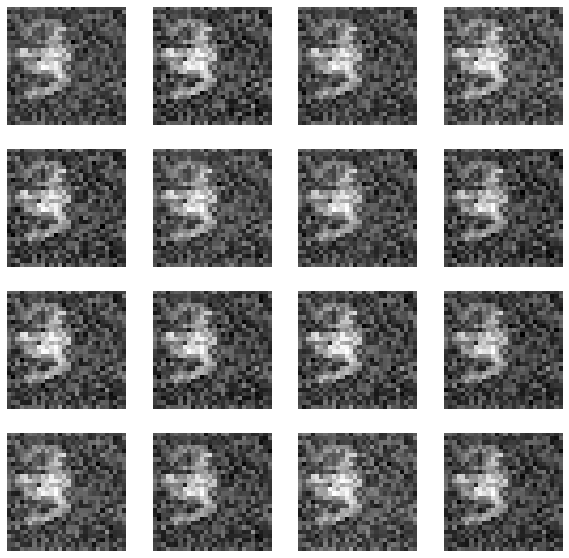

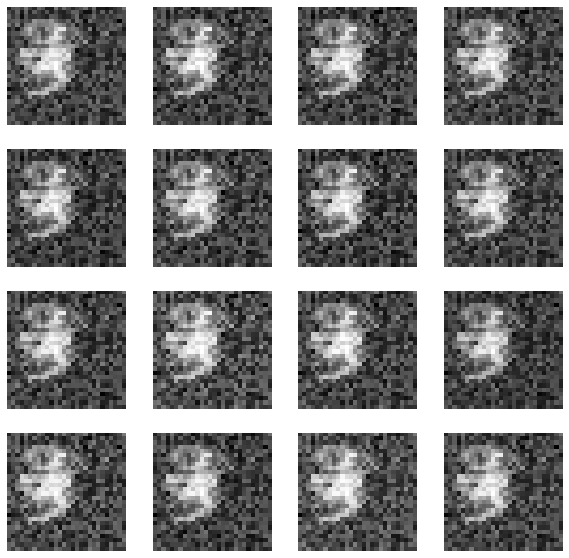

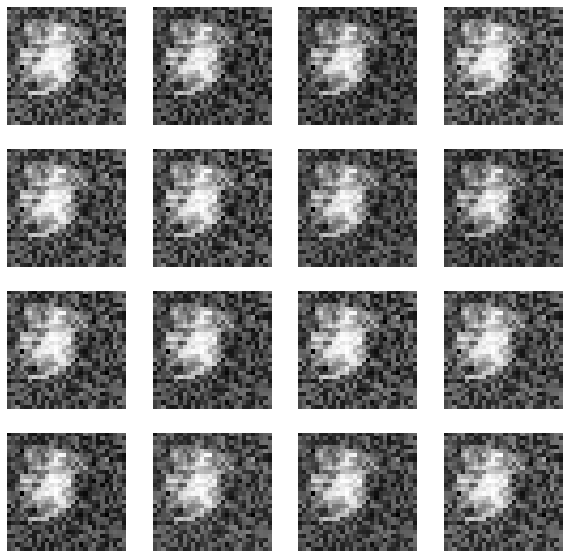

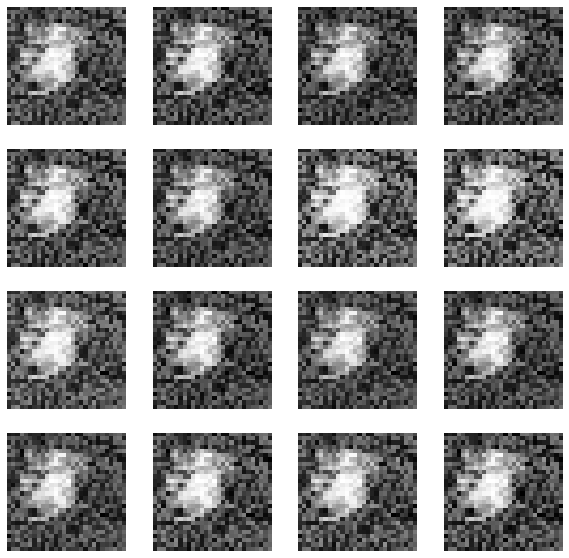

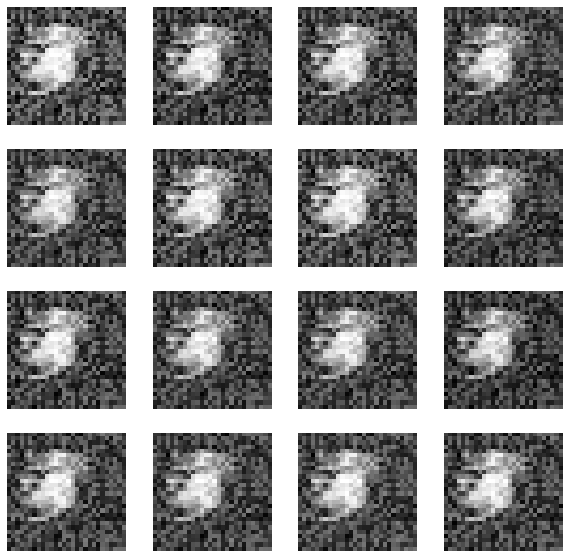

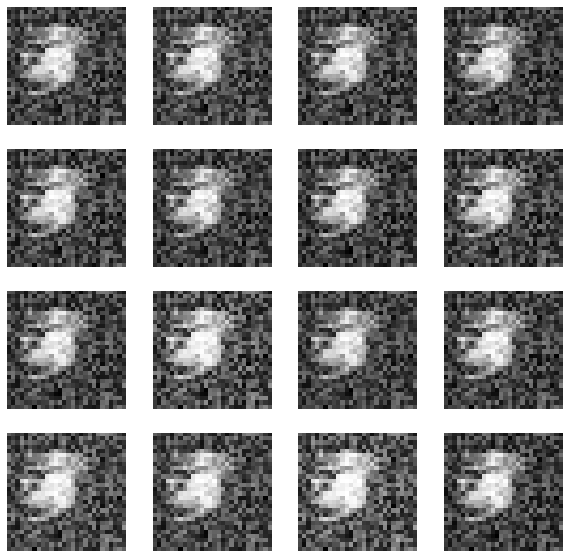

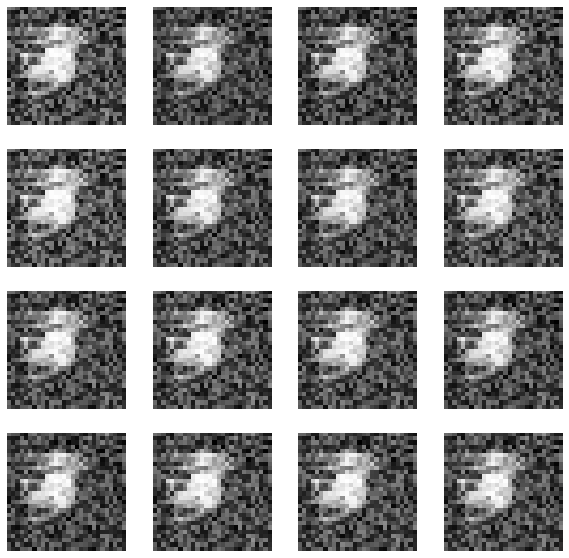

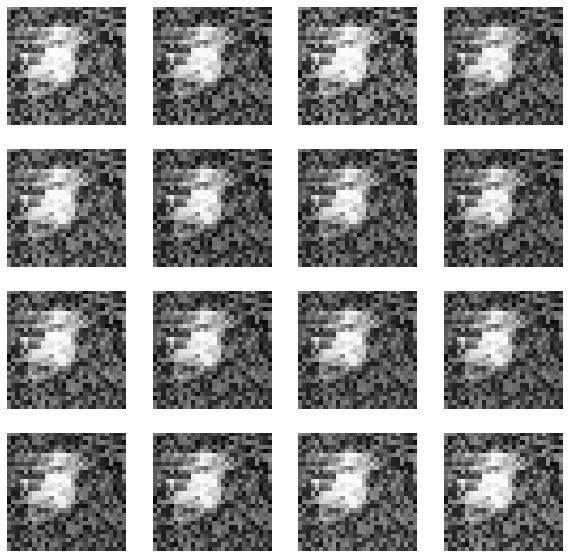

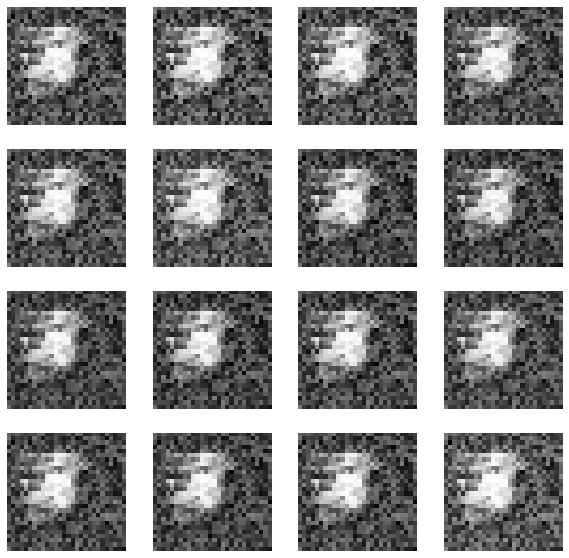

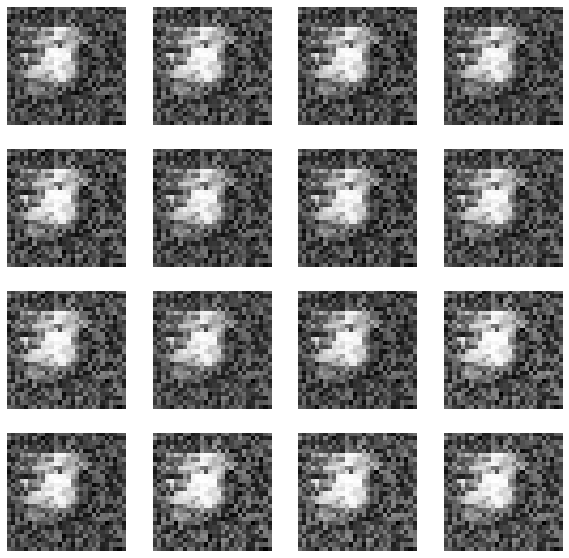

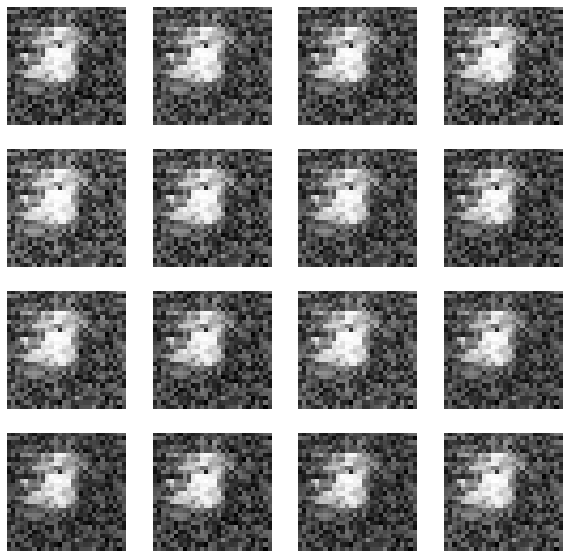

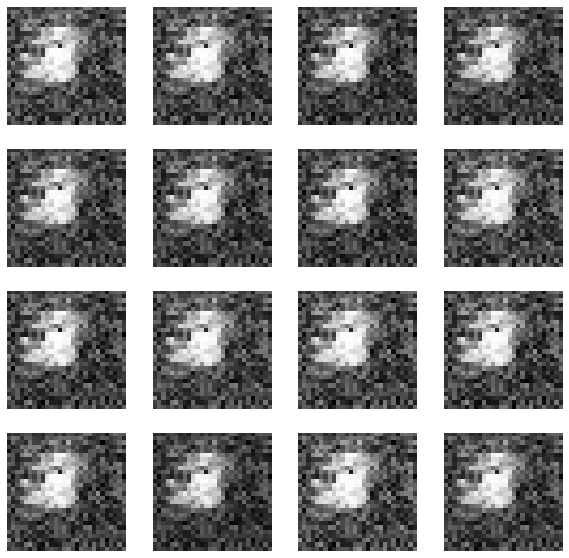

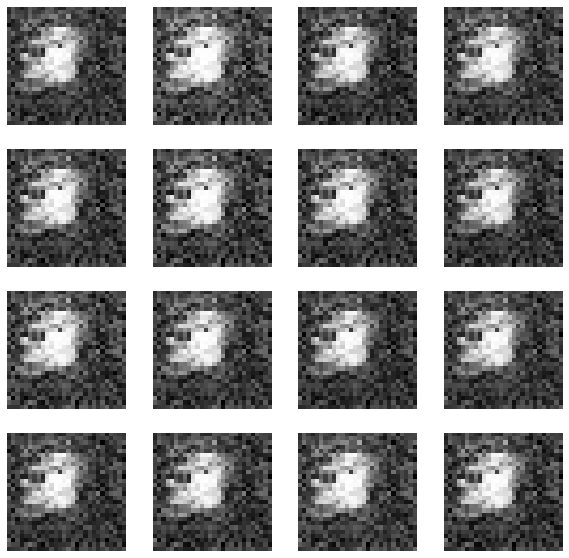

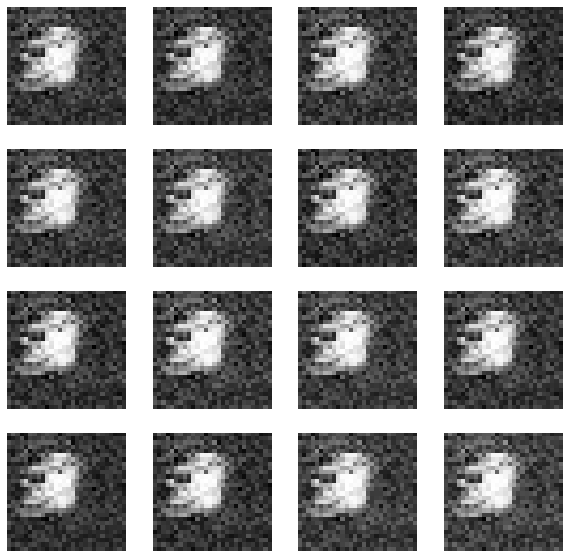

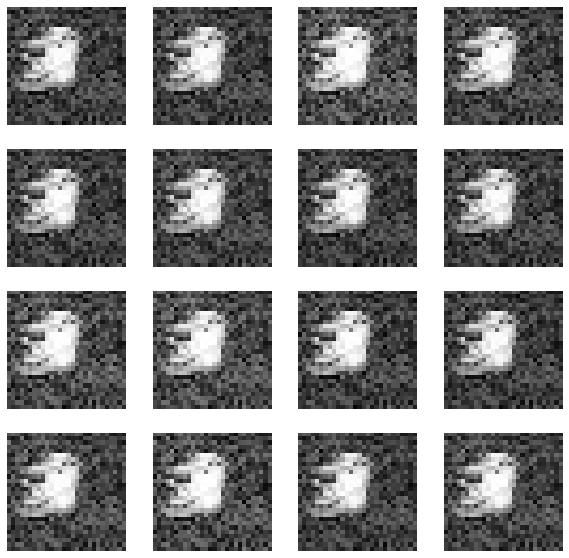

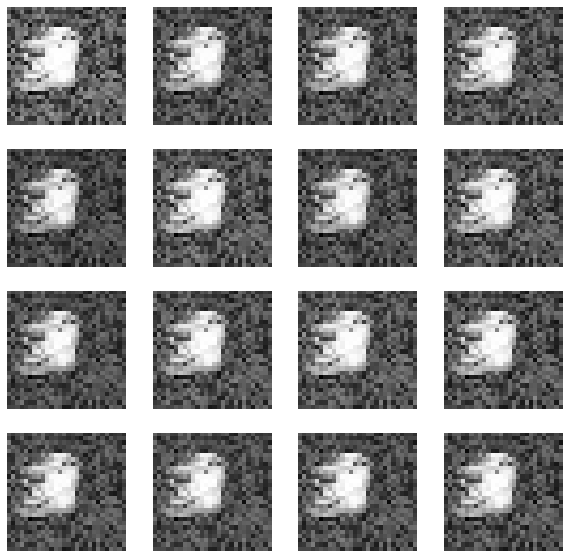

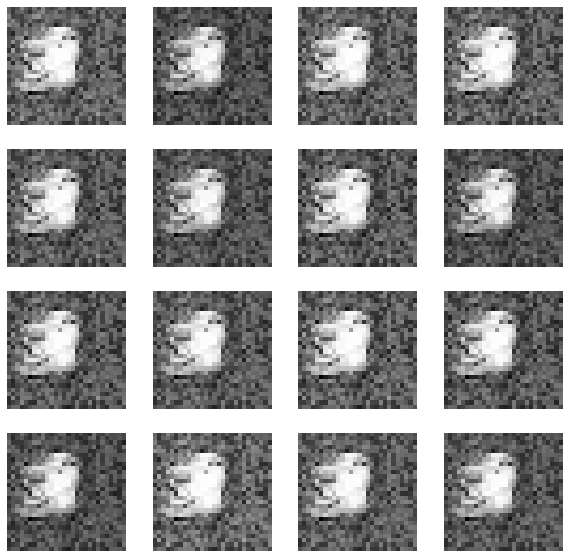

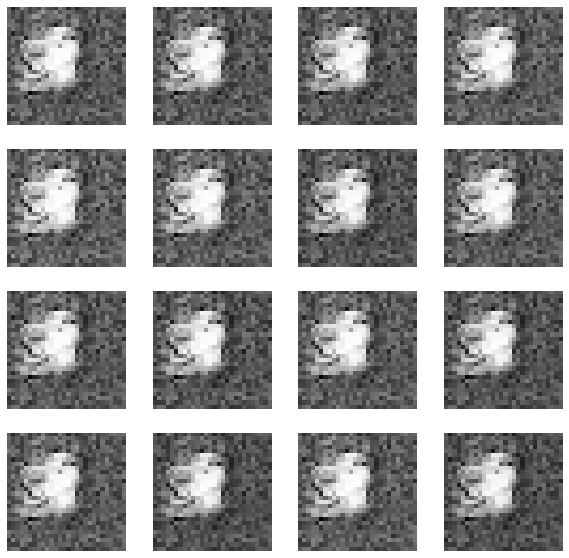

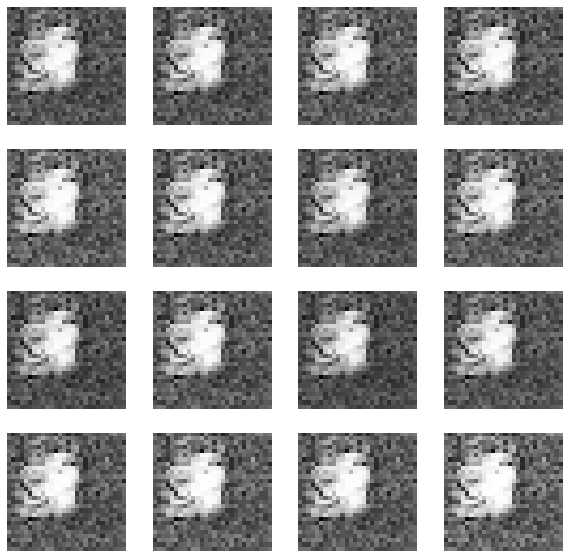

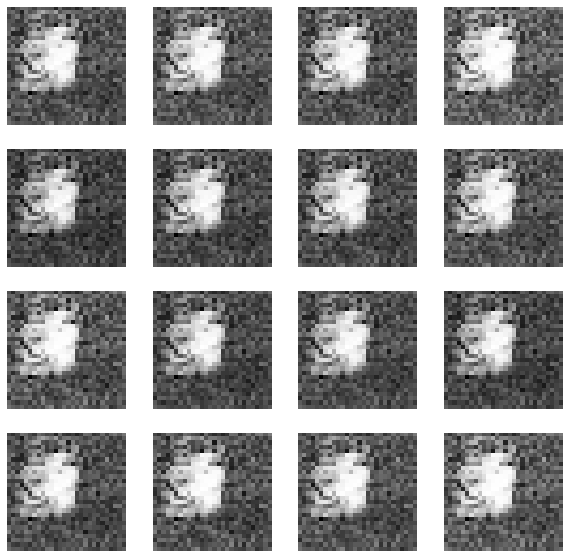

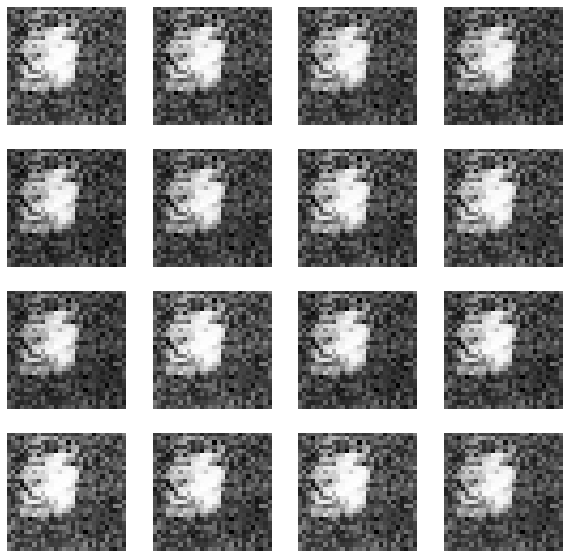

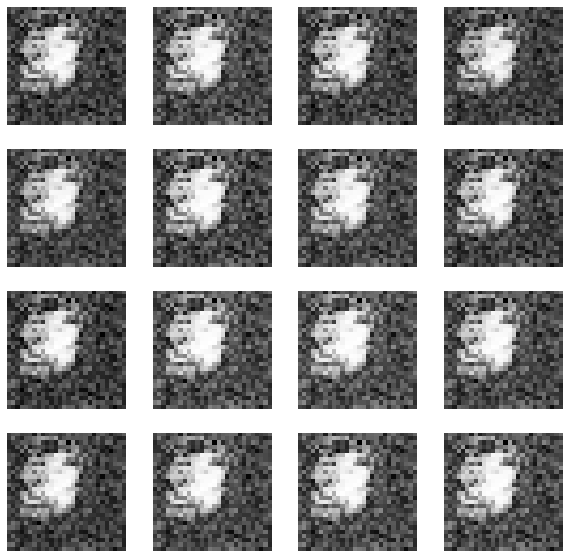

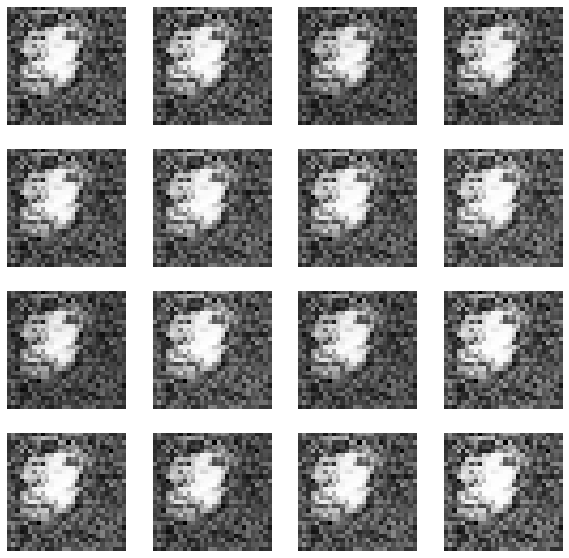

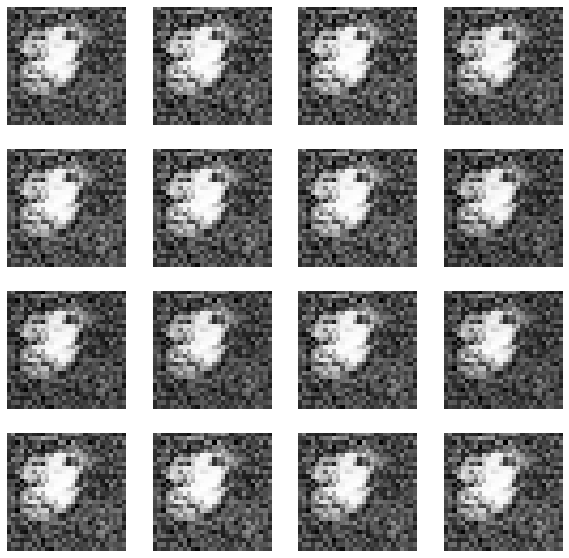

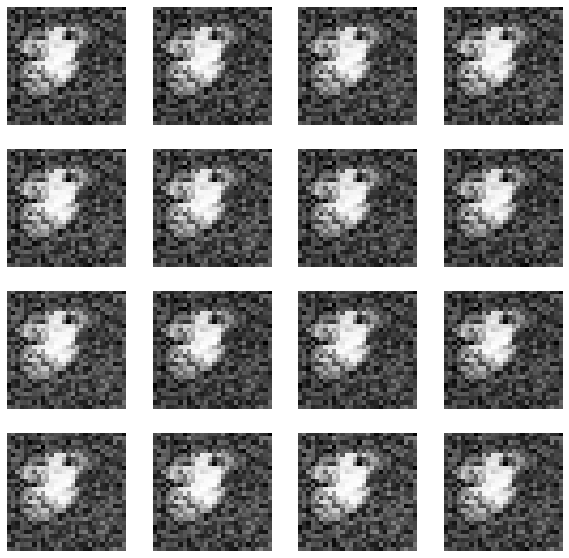

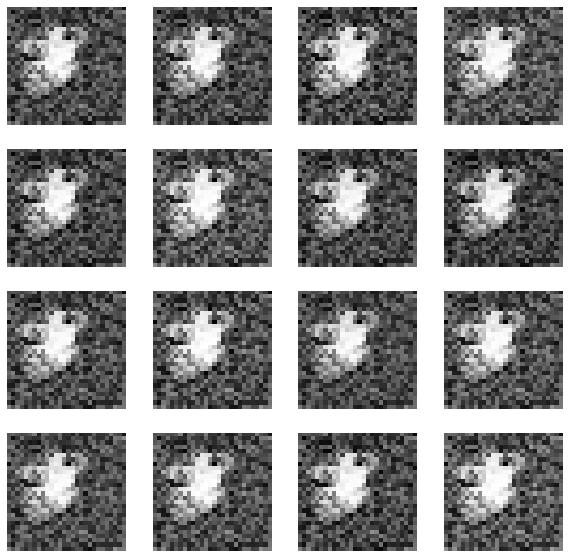

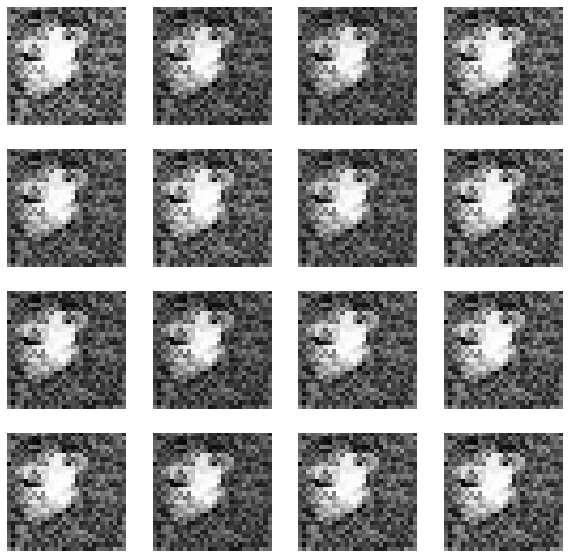

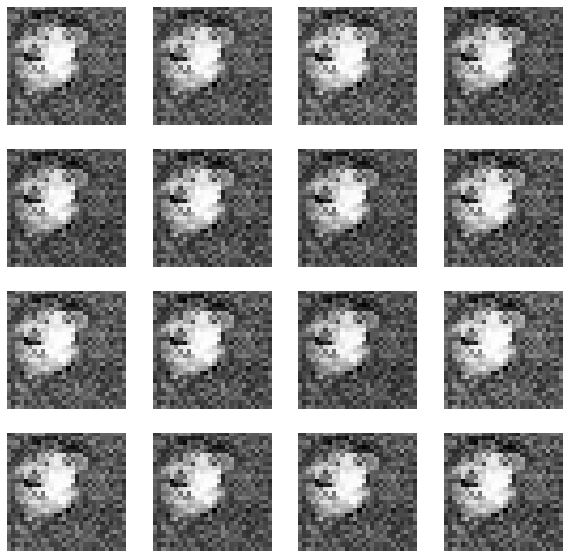

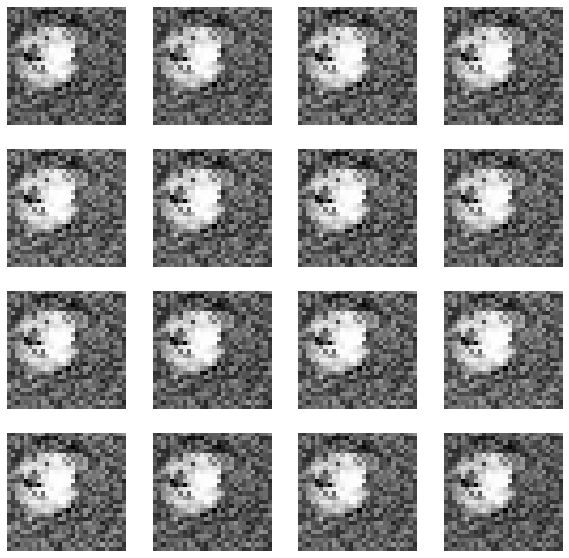

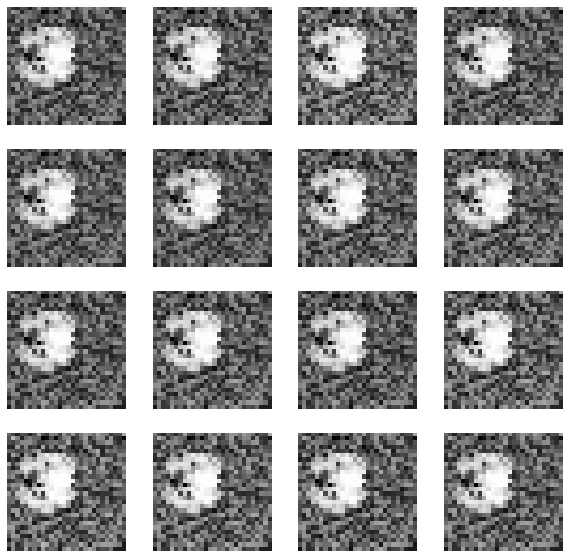

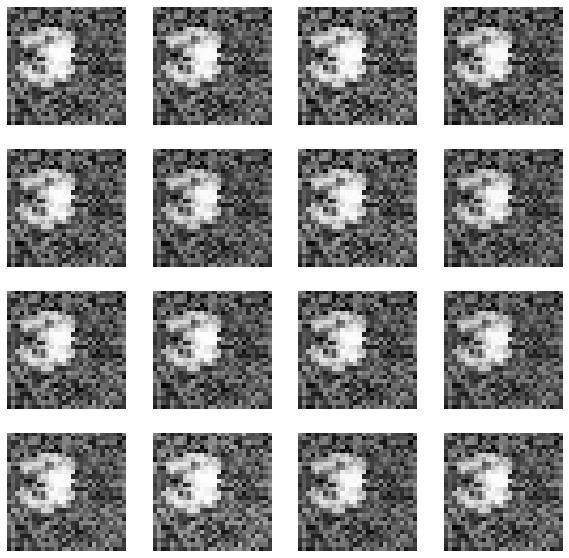

In [8]:
import os
import torch
from torch import nn
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt
import uuid


# Configurable variables
NUM_EPOCHS = 50
NOISE_DIMENSION = 50
BATCH_SIZE = 64
PRINT_STATS_AFTER_BATCH = 50
OPTIMIZER_LR = 0.0002
OPTIMIZER_BETAS = (0.5, 0.999)
GENERATOR_OUTPUT_IMAGE_SHAPE = 28 * 28 * 1


"""
  nn.Module - Base class for all neural network ... use includes initializing the parameters of a model
"""
class Generator(nn.Module):
  """
    Vanilla GAN Generator
  """
  def __init__(self,):
    super().__init__()
    self.layers = nn.Sequential(
      # First upsampling
      nn.Linear(NOISE_DIMENSION, 128, bias=False),
      nn.BatchNorm1d(128, 0.8),
      nn.LeakyReLU(0.25),
      # Second upsampling
      nn.Linear(128, 256, bias=False),
      nn.BatchNorm1d(256, 0.8),
      nn.LeakyReLU(0.25),
      # Third upsampling
      nn.Linear(256, 512, bias=False),
      nn.BatchNorm1d(512, 0.8),
      nn.LeakyReLU(0.25),
      # Final upsampling
      nn.Linear(512, GENERATOR_OUTPUT_IMAGE_SHAPE, bias=False),
      nn.Tanh()
    )

  def forward(self, x):
    """Forward pass"""
    return self.layers(x)


"""
  nn.Module - Base class for all neural network ... use includes initializing the parameters of a model
"""
class Discriminator(nn.Module):
  """
    Vanilla GAN Discriminator
  """
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(
      nn.Linear(GENERATOR_OUTPUT_IMAGE_SHAPE, 1024), 
      nn.LeakyReLU(0.25),
      nn.Linear(1024, 512),
      nn.LeakyReLU(0.25),
      nn.Linear(512, 256), 
      nn.LeakyReLU(0.25),
      nn.Linear(256, 1),
      nn.Sigmoid()
    )

  def forward(self, x):
    """Forward pass"""
    return self.layers(x)


def get_device():
  """ Retrieve device based on settings and availability. """
  return torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    

def generate_image(generator, epoch = 0, batch = 0, device=get_device()):
  """ Generate subplots with generated examples. """
  images = []
  noise = generate_noise(BATCH_SIZE, device=device)
  generator.eval()
  images = generator(noise)
  plt.figure(figsize=(10, 10))
  for i in range(16):
    # Get image
    image = images[i]
    # Convert image back onto CPU and reshape
    image = image.cpu().detach().numpy()
    image = np.reshape(image, (28, 28))
    # Plot
    plt.subplot(4, 4, i+1)
    plt.imshow(image, cmap='gray')
    plt.axis('off')


def print_training_progress(batch, generator_loss, discriminator_loss):
  """ Print training progress. """
  print('Losses after mini-batch %5d: generator %e, discriminator %e' %
        (batch, generator_loss, discriminator_loss))


def initialize_models(device = get_device()):
  """ Initialize Generator and Discriminator models """
  generator = Generator()
  discriminator = Discriminator()
  # Move models to specific device
  generator.to(device)
  discriminator.to(device)
  # Return models
  return generator, discriminator


def initialize_loss():
  """ Initialize loss function. Binary Cross Entropy"""
  return nn.BCELoss()


def initialize_optimizers(generator, discriminator):
  """ Initialize optimizers for Generator and Discriminator. """
  '''
    AdamW - To be studied in details
  '''
  generator_optimizer = torch.optim.AdamW(generator.parameters(), lr=OPTIMIZER_LR,betas=OPTIMIZER_BETAS)
  discriminator_optimizer = torch.optim.AdamW(discriminator.parameters(), lr=OPTIMIZER_LR,betas=OPTIMIZER_BETAS)
  return generator_optimizer, discriminator_optimizer
  

def generate_noise(number_of_images = 1, noise_dimension = NOISE_DIMENSION, device=None):
  """ Generate noise for number_of_images images, with a specific noise_dimension """
  return torch.randn(number_of_images, noise_dimension, device=device)


def forward_and_backward(model, data, loss_function, targets):
  """
    Perform forward and backward pass in a generic way. Returns loss value.
  """
  outputs = model(data)
  error = loss_function(outputs, targets)
  error.backward()
  return error.item()


def perform_train_step(generator, discriminator, real_data, \
  loss_function, generator_optimizer, discriminator_optimizer, device = get_device()):
  """ Perform a single training step. """
  
  # 1. PREPARATION
  # Set real and fake labels.
  real_label, fake_label = 1.0, 0.0
  # Get images on CPU or GPU as configured and availablevv
  # Also set 'actual batch size', whih can be smaller than BATCH_SIZE
  # in some cases.
  real_images = real_data[0].to(device)
  actual_batch_size = real_images.size(0)
  '''
    Creates a tensor of size size filled with fill_value. The tensor’s dtype is inferred from fill_value.
  '''
  label = torch.full((actual_batch_size,1), real_label, device=device)
  
  # 2. TRAINING THE DISCRIMINATOR
  # Zero the gradients for discriminator
  '''


  In PyTorch, for every mini-batch during the training phase, we typically want to explicitly set the gradients to zero 
  before starting to do backpropragation (i.e., updating the Weights and biases) because PyTorch accumulates the gradients 
  on subsequent backward passes. This accumulating behaviour is convenient while training RNNs or when we want to compute 
  the gradient of the loss summed over multiple mini-batches. So, the default action has been set to accumulate (i.e. sum) 
  the gradients on every loss.backward() call.

  Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the 
  parameter update correctly. Otherwise, the gradient would be a combination of the old gradient, which you have already 
  used to update your model parameters, and the newly-computed gradient. It would therefore point in some other direction 
  than the intended direction towards the minimum (or maximum, in case of maximization objectives).

  '''
  discriminator.zero_grad()
  # Forward + backward on real images, reshaped
  real_images = real_images.view(real_images.size(0), -1)
  error_real_images = forward_and_backward(discriminator, real_images, \
    loss_function, label)
  # Forward + backward on generated images
  noise = generate_noise(actual_batch_size, device=device)
  generated_images = generator(noise)
  label.fill_(fake_label)
  '''
    Adding a .detach() basically breaks the gradient connection.
    This means that any gradient flowing back towards fake_data won’t be propagated to the generator. So no gradient will be populated.

    Because you want the discriminator loss to only compute gradients for the discriminator and not the generator.
    The .detach() here allows you to make sure this happens.

    If you do it for the generator loss, then the generator loss won’t contribute to the generator gradient which is not what you want.
  '''
  error_generated_images =forward_and_backward(discriminator, \
    generated_images.detach(), loss_function, label)
  # Optim for discriminator
  discriminator_optimizer.step()
  
  # 3. TRAINING THE GENERATOR
  # Forward + backward + optim for generator, including zero grad
  '''


  In PyTorch, for every mini-batch during the training phase, we typically want to explicitly set the gradients to zero 
  before starting to do backpropragation (i.e., updating the Weights and biases) because PyTorch accumulates the gradients 
  on subsequent backward passes. This accumulating behaviour is convenient while training RNNs or when we want to compute 
  the gradient of the loss summed over multiple mini-batches. So, the default action has been set to accumulate (i.e. sum) 
  the gradients on every loss.backward() call.

  Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the 
  parameter update correctly. Otherwise, the gradient would be a combination of the old gradient, which you have already 
  used to update your model parameters, and the newly-computed gradient. It would therefore point in some other direction 
  than the intended direction towards the minimum (or maximum, in case of maximization objectives).

  '''
  generator.zero_grad()
  label.fill_(real_label)
  error_generator = forward_and_backward(discriminator, generated_images, loss_function, label)
  generator_optimizer.step()
  
  # 4. COMPUTING RESULTS
  # Compute loss values in floats for discriminator, which is joint loss.
  error_discriminator = error_real_images + error_generated_images
  # Return generator and discriminator loss so that it can be printed.
  return error_generator, error_discriminator
  

def perform_epoch(dataloader, generator, discriminator, loss_function, \
    generator_optimizer, discriminator_optimizer, epoch):
  """ Perform a single epoch. """
  for batch_no, real_data in enumerate(dataloader):
    # Perform training step
    generator_loss_val, discriminator_loss_val = perform_train_step(generator, \
      discriminator, real_data, loss_function, \
      generator_optimizer, discriminator_optimizer)
    # Print statistics and generate image after every n-th batch
    if batch_no % PRINT_STATS_AFTER_BATCH == 0:
      print_training_progress(batch_no, generator_loss_val, discriminator_loss_val)
      generate_image(generator, epoch, batch_no)
  # Save models on epoch completion - not required as of now

  # save_models(generator, discriminator, epoch)

  # Clear memory after every epoch
  torch.cuda.empty_cache()
  

""" Train the DCGAN. """
# Set fixed random number seed
torch.manual_seed(42)
# Get prepared dataset
dataloader = train_dataloader
# Initialize models
generator, discriminator = initialize_models()
# Initialize loss and optimizers
loss_function = initialize_loss()
generator_optimizer, discriminator_optimizer = initialize_optimizers(generator, discriminator)
# Train the model
for epoch in range(NUM_EPOCHS):
  print(f'Starting epoch {epoch}...')
  perform_epoch(dataloader, generator, discriminator, loss_function, generator_optimizer, discriminator_optimizer, epoch)       